# **Análisis de Sistemas Térmicos usando Python**

In [1]:
#pip install Coolprop

En este notebook se presenta un ejemplo de cómo usar Python para analizar las propiedades de aire húmedo. En particular, se presenta un ejemplo de cómo usar Python para estimar propiedades termofísicas y graficarlas en el diagrama psicrométrico.

Partamos importando las librerías necesarias para trabajar.

In [2]:
import numpy as np
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt

Existen varias librerías de Python, entre ellas psucrolib. Sin embargo, para efectos de este curso consideraremos una función especial de la libre´ria Coolprop trabajar con aire húmedo. La razón de esto es para explorar la misma librería que hemos usado en los módulos anteriores.

In [3]:
from CoolProp.HumidAirProp import HAPropsSI

La función HAPropsSI de Coolprop es levemente diferente a la fiunción PropsSI que hemos usado anteriormente. En particular, la función HAPropsSI tiene un argumento adicional que es la presión. Recordemos la regla de fases de gibbs:

$F = 2 + C - P$

Donde $F$ es el número de grados de libertad, $C$ es el número de componentes y $P$ es el número de fases. En el caso del aire húmedo, tenemos dos componentes (aire y agua) y una fase (aire húmedo). Por lo tanto, el número de grados de libertad es 3. Así, para determinar el estado termodinámico del aire húmedo, necesitamos 3 propiedades intensivas, donde comunmente una de ellas es la presión.

Luego, a través de la función HAPropsSI podemos determinar por ejemplo la entalpía del aire húmedo, como función de la temperatura, la humedad relativa y la presión.

Consideremos una temperatura de 25°C, una humedad relativa de 50% y una presión de 1 atm.  Luego, la entalpía del aire húmedo es:

In [4]:
T_1 = 25 + 273.15 # K
R_1 = 0.5 # Relative Humidity
P_1 = 101325 #Pa
h = HAPropsSI('H','T',T_1,'P',P_1,'R',R_1); print(h)

W_1 = HAPropsSI('W','T',T_1,'P',P_1,'R',R_1)

50423.45039131537


Similarmente, podemos determinar la temperatura de saturación del aire húmedo a la entalía antes calculada. Para esto, usamos la función HAPropsSI con la presión, la entalpía y humedad relativa como argumentos.

In [5]:
P_2 = P_1
R_2 = 1.0
T_2 = HAPropsSI('T','P',P_2,'H',h,'R',1.0); print(T_2)

W_2 = HAPropsSI('W','T',T_2,'P',P_2,'R',R_2)

290.962092469092


Destacando que en esta función el orden de los argumentos de entrada no alteran el resultado.

In [7]:
T_2_aux = HAPropsSI('T','H',h,'R',1.0,'P',P_2); print(T_2_aux)

290.962092469092


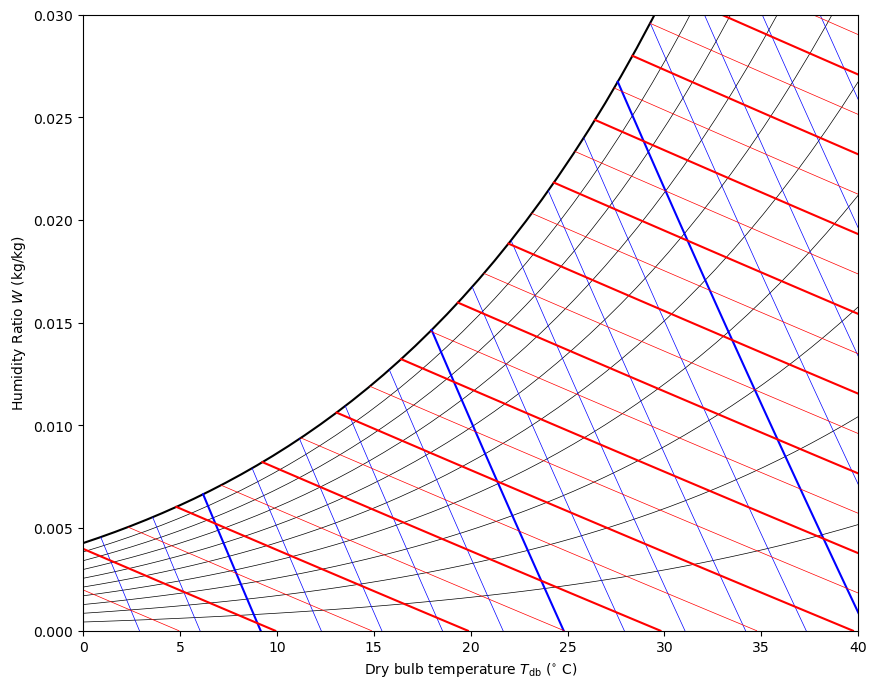

In [28]:
Pressure = 90000# Pa 

fig, ax = plt.subplots(1,1,figsize=(10, 8))
Tdbvec = np.linspace(0, 40)+273.15

# Lines of constant relative humidity
for RH in np.arange(0.1, 1, 0.1):
    W = CP.HAPropsSI("W","R",RH,"P",Pressure,"T",Tdbvec)
    plt.plot(Tdbvec-273.15, W, color='k', lw = 0.5)

# Saturation curve
W = CP.HAPropsSI("W","R",1,"P",Pressure,"T",Tdbvec)
plt.plot(Tdbvec-273.15, W, color='k', lw=1.5)

# Lines of constant Vda
for Vda in np.arange(0.79, 1.041, 0.01):
    R = np.linspace(0,1)
    W = CP.HAPropsSI("W","R",R,"P",Pressure,"Vda",Vda)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",Pressure,"Vda",Vda)
    plt.plot(Tdb-273.15, W, color='b', lw=1.5 if abs(Vda % 0.05) < 0.001 else 0.5)

# Lines of constant Enthalpy
for h in np.arange(0, 120, 5):
    R = np.linspace(0.0, 1)
    #print(h)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",Pressure,"H",h*1000)
    W = CP.HAPropsSI("W","R",R,"P",Pressure,"Tdb",Tdb)
    plt.plot(Tdb-273.15, W, color='r', lw=1.5 if abs(h % 10) < 0.001 else 0.5)

plt.xlabel(r'Dry bulb temperature $T_{\rm db}$ ($^{\circ}$ C)')
plt.ylabel(r'Humidity Ratio $W$ (kg/kg)')
plt.ylim(0, 0.030)
plt.xlim(0, 40)
plt.show()

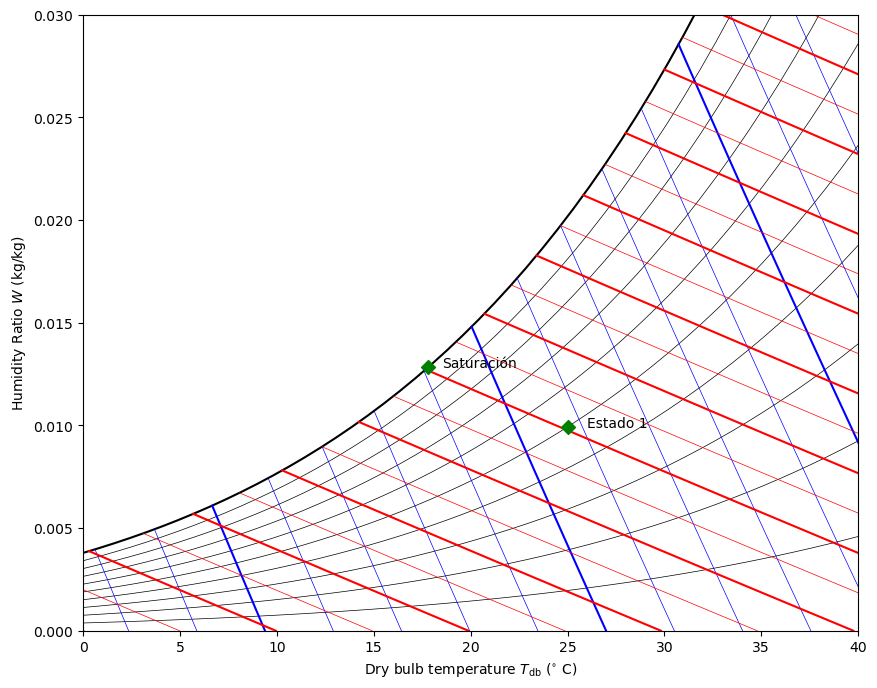

In [21]:
Pressure = P_1# Pa 

fig, ax = plt.subplots(1,1,figsize=(10, 8))
Tdbvec = np.linspace(0, 40)+273.15

# Lines of constant relative humidity
for RH in np.arange(0.1, 1, 0.1):
    W = CP.HAPropsSI("W","R",RH,"P",Pressure,"T",Tdbvec)
    plt.plot(Tdbvec-273.15, W, color='k', lw = 0.5)

# Saturation curve
W = CP.HAPropsSI("W","R",1,"P",Pressure,"T",Tdbvec)
plt.plot(Tdbvec-273.15, W, color='k', lw=1.5)

# Lines of constant Vda
for Vda in np.arange(0.69, 0.961, 0.01):
    R = np.linspace(0,1)
    W = CP.HAPropsSI("W","R",R,"P",Pressure,"Vda",Vda)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",Pressure,"Vda",Vda)
    plt.plot(Tdb-273.15, W, color='b', lw=1.5 if abs(Vda % 0.05) < 0.001 else 0.5)

# Lines of constant Enthalpy
for h in np.arange(0, 120, 5):
    R = np.linspace(0.0, 1)
    #print(h)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",Pressure,"H",h*1000)
    W = CP.HAPropsSI("W","R",R,"P",Pressure,"Tdb",Tdb)
    plt.plot(Tdb-273.15, W, color='r', lw=1.5 if abs(h % 10) < 0.001 else 0.5)
    
# Puntos con los estado termodinámicos
e_h = 1.04 # Espaciamiento horizontal
#Estado 1
plt.scatter(T_1-273.15, W_1, c='g',s=50,zorder=5,marker='D') 
plt.annotate('Estado 1', ((T_1-273.15)*e_h, W_1))

#Estado 2
plt.scatter(T_2-273.15, W_2, c='g',s=50,zorder=5,marker='D') 
plt.annotate('Saturación', ((T_2-273.15)*e_h, W_2))
    
plt.xlabel(r'Dry bulb temperature $T_{\rm db}$ ($^{\circ}$ C)')
plt.ylabel(r'Humidity Ratio $W$ (kg/kg)')
plt.ylim(0, 0.030)
plt.xlim(0, 40)
plt.show()